In [7]:
import numpy as np
import yfinance as yf
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start = '1995-1-1')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7712 entries, 1995-01-03 to 2025-08-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7712 non-null   float64
 1   MSFT    7712 non-null   float64
 2   F       7712 non-null   float64
 3   GE      7712 non-null   float64
dtypes: float64(4)
memory usage: 301.2 KB


In [9]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.300324,2.302168,3.361906,20.133738
1995-01-04,7.241804,2.318904,3.452360,20.133738
1995-01-05,7.139396,2.280654,3.422210,20.183094
1995-01-06,7.154030,2.318904,3.422210,20.084394
1995-01-09,7.124767,2.304560,3.482511,19.886999


In [10]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2025-08-18,155.720001,516.251282,11.46,268.450012
2025-08-19,158.399994,508.933350,11.58,265.929993
2025-08-20,159.509995,504.890015,11.49,266.440002
2025-08-21,158.729996,504.239990,11.33,268.709991
2025-08-22,158.669998,507.230011,11.74,266.529999


In [11]:
mydata.iloc[0]

PG       7.300324
MSFT     2.302168
F        3.361906
GE      20.133738
Name: 1995-01-03 00:00:00, dtype: float64

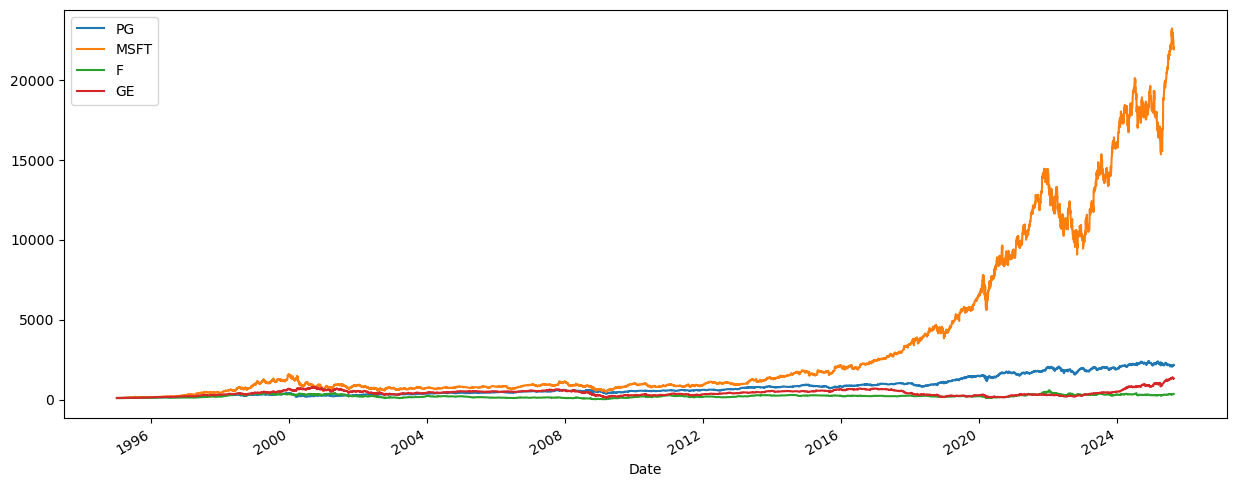

In [12]:
(mydata/mydata.iloc[0]*100).plot(figsize = (15,6));

<Axes: xlabel='Date'>

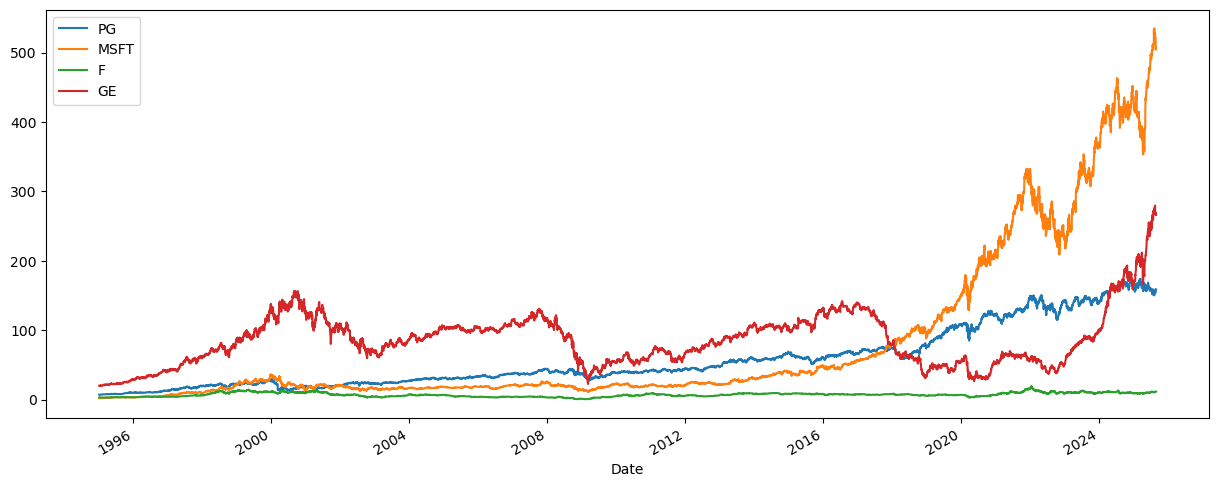

In [13]:
mydata.plot(figsize = (15,6))

In [14]:
mydata.loc['1995-1-03']

PG       7.300324
MSFT     2.302168
F        3.361906
GE      20.133738
Name: 1995-01-03 00:00:00, dtype: float64

In [15]:
mydata.iloc[0]

PG       7.300324
MSFT     2.302168
F        3.361906
GE      20.133738
Name: 1995-01-03 00:00:00, dtype: float64

In [16]:
#CALCULATING THE RETURN OF A PORTFOLIO OF SECURITIES

In [18]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002451
1995-01-06,0.002050,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [19]:
weights = np.array([0.25,0.25,0.25,0.25])

In [20]:
np.dot(returns,weights)

array([        nan,  0.00653973, -0.00922944, ..., -0.00169784,
       -0.00289572,  0.00840652])

In [23]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.123835
MSFT    0.222516
F       0.120110
GE      0.134598
dtype: float64

In [25]:
np.dot(annual_returns, weights).item()

0.15026482805145217

In [33]:
pfolio_1 = str(round(np.dot(annual_returns,weights) *100,3))+'%'
print(pfolio_1)

15.026%


In [34]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [37]:
pfolio_2 = str(round(np.dot(annual_returns, weights)*100,3)) + '%'
print(pfolio_1)
print(pfolio_2)

15.026%
15.026%
